In [1]:
import pandas as pd
import numpy as np
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns

from anticor_features.anticor_features import get_anti_cor_genes
import topo as tp
from topo.tpgraph.intrinsic_dim import IntrinsicDim

In [2]:
import datetime
print(datetime.datetime.now().isoformat())

2025-02-26T10:40:08.602736


In [3]:
adata = sc.read_h5ad('./data/tubeworm/tubeworm_nonorm.h5ad')
annot = sc.read_h5ad('./data/tubeworm/tubeworm.h5ad')

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/anndata/compat/__init__.py:311: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


In [4]:
annot

AnnData object with n_obs × n_vars = 5385 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSource', 'percent.mt', 'percent.sym', 'RNA_snn_res.0.15', 'seurat_clusters', 'celltype'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [5]:
adata.obs = annot.obs
adata.obs['celltype'] = adata.obs['celltype']+1
adata.obsm['paper_umap'] = annot.obsm['X_umap']

In [6]:
celltypes = {
    1: 'peritoneal cells',
    2: 'Bac-P',
    3: 'Bac-C',
    4: 'efferent arteriole cells 1',
    5: 'efferent arteriole cells 2',
    6: 'efferent arteriole cells 3',
    7: 'muscle',
    8: 'spermatozoa'
}

adata.obs['celltype'] = adata.obs['celltype'].map(celltypes)

/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/homebrew/Caskroom/mambaforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


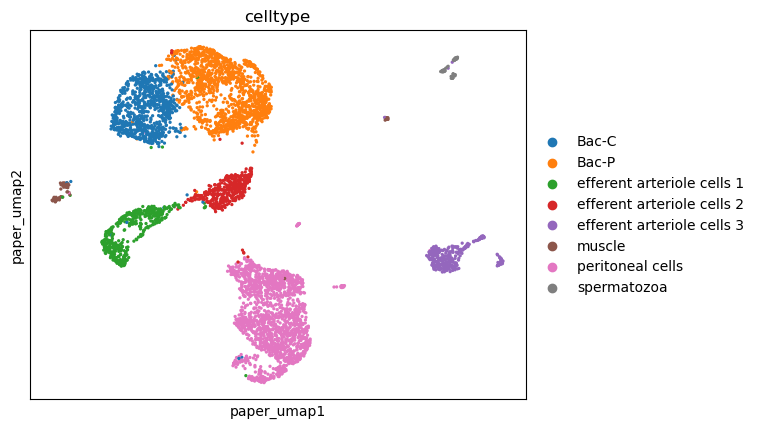

In [7]:
sc.pl.embedding(adata, basis='paper_umap', color='celltype')

In [8]:
adata.raw.var.columns = ['index']

In [9]:
adata.write('./data/tubeworm/starterpack/tubeworm.h5ad')